In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## I. Đọc file csv mới đã clean

In [19]:
df = pd.read_csv('clean_application_train.csv')

In [20]:
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

* 1/ `TARGET`: Biến nhãn (label) cho biết khách hàng có rủi ro tín dụng hay không sau khi khoản vay được giải ngân
    * Nhãn `1`: Khách hàng đã gặp khó khăn trong việc trả nợ
    * Nhãn `0`: Khách hàng trả nợ bình thường, không có dấu hiệu rủi ro sớm

* 2/ `NAME_CONTRACT_TYPE`: Loại hình tín dụng mà khách hàng đăng ký

* 3/ `CODE_GENDER`: Giới tính khách hàng

* 4/ `FLAG_OWN_CAR`: Cho biết khách hàng có sở hữu ô tô hay không

* 5/ `FLAG_OWN_REALTY`: Cho biết khách hàng có sở hữu bất động sản để ở (nhà hoặc căn hộ) hay không

* 6/ `CNT_CHILDREN`: Số lượng con cái khách hàng đang nuôi dưỡng

* 7/ `AMT_INCOME_TOTAL`: Tổng thu nhập khai báo của khách hàng

* 8/ `AMT_CREDIT`: Số tiền mà khách hàng được cấp vay trong hợp đồng tín dụng

* 9/ `AMT_ANNUITY`: Số tiền khách hàng phải trả định kỳ cho khoản vay

* 10/ `NAME_INCOME_TYPE`: Hình thức tạo ra thu nhập / nguồn thu nhập chính của khách hàng

* 11/ `NAME_EDUCATION_TYPE`: Trình độ học vấn cao nhất của khách hàng

* 12/ `NAME_FAMILY_STATUS`: Tình trạng hôn nhân / cấu trúc gia đình của khách hàng tại thời điểm vay

* 13/ `NAME_HOUSING_TYPE`: Tình trạng nhà ở hiện tại của khách hàng

* 14/ `REGION_POPULATION_RELATIVE`: Mật độ dân số của khu vực nơi khách hàng sinh sống, đã được chuẩn hoá (normalized) về một thang đo tương đối

* 15/ `AGE_YEARS`: Tuổi của khách hàng tại thời điểm nộp hồ sơ vay

* 16/ `DAYS_EMPLOYED`: Số ngày khách hàng đã làm công việc hiện tại tính đến thời điểm nộp hồ sơ vay

* 17/ `DAYS_REGISTRATION`: Số ngày tính lùi từ thời điểm nộp hồ sơ vay đến lần gần nhất khách hàng thay đổi đăng ký cư trú (registration/address)

* 18/ `DAYS_ID_PUBLISH`: Số ngày tính lùi từ thời điểm nộp hồ sơ vay đến lần gần nhất khách hàng cập nhật/thay đổi giấy tờ định danh (CMND/CCCD/Hộ chiếu...)

* 19/ `FLAG_EMP_PHONE`: Khách hàng có cung cấp số điện thoại nơi làm việc hay không

* 20/ `OCCUPATION_TYPE`: Nghề nghiệp của khách hàng

* 21/ `CNT_FAM_MEMBERS`: Số thành viên trong gia đình khách hàng

* 22/ `REGION_RATING_CLIENT`: Biến đánh giá mức độ chất lượng của khu vực nơi sinh sống (1-3)

* 23/ `REGION_RATING_CLIENT_W_CITY`: Giống REGION_RATING_CLIENT nhưng có xét thêm yếu tố thành phố, phản ánh chi tiết hơn theo vị trí địa lý (1–3)

* 24/ `ORGANIZATION_TYPE`: Loại hình tổ chức/nơi làm việc của khách hàng

* 25/ `OCCUPATION_MISSING_FLAG`: Khách hàng có khai báo nghề nghiệp hay không

## II. Data Visualization

In [30]:
# Cấu hình style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set font size mặc định
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

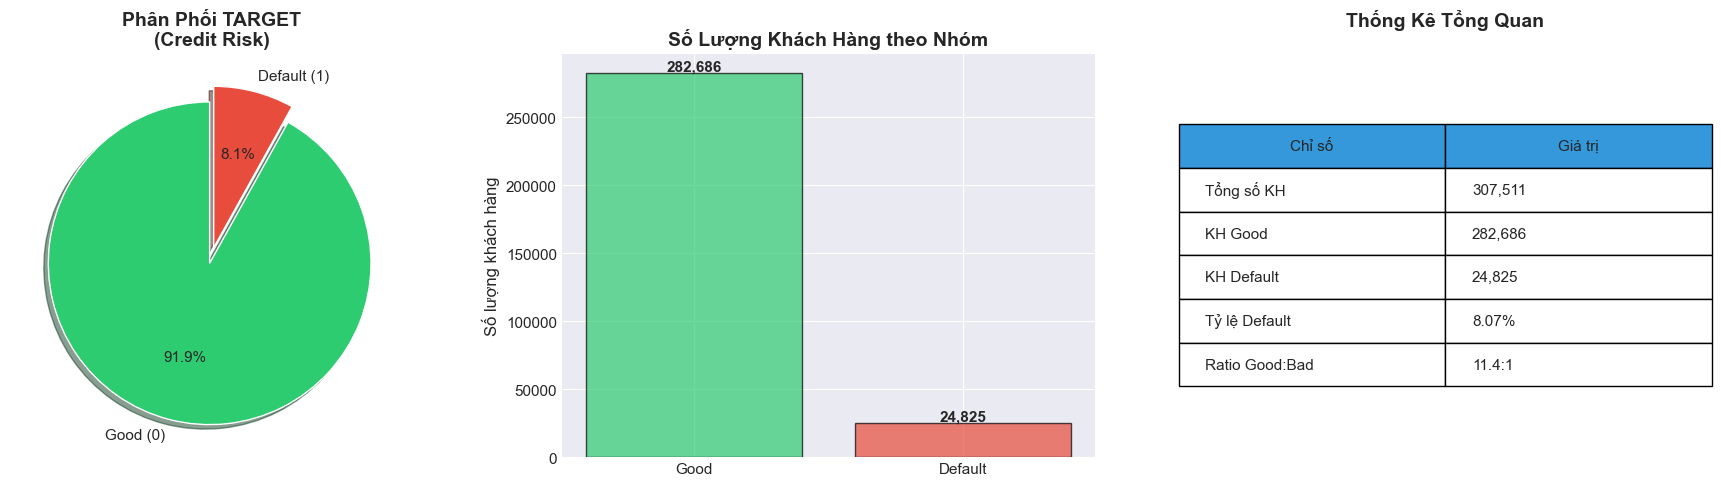

📊 INSIGHT 1: Dataset bị mất cân bằng nghiêm trọng với tỷ lệ Good:Default ~11:1
💡 Cần sử dụng: SMOTE, class_weight, hoặc stratified sampling khi training model


In [31]:
# Phân tích tổng quan TARGET
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subplot 1: Pie chart
target_counts = df['TARGET'].value_counts()
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)

axes[0].pie(target_counts, labels=['Good (0)', 'Default (1)'], autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode, shadow=True)
axes[0].set_title('Phân Phối TARGET\n(Credit Risk)', fontsize=14, fontweight='bold')

# Subplot 2: Bar chart với số lượng
axes[1].bar(['Good', 'Default'], target_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Số lượng khách hàng', fontsize=12)
axes[1].set_title('Số Lượng Khách Hàng theo Nhóm', fontsize=14, fontweight='bold')
for i, v in enumerate(target_counts.values):
    axes[1].text(i, v + 2000, f'{v:,}', ha='center', fontweight='bold')

# Subplot 3: Metrics table
metrics_data = [
    ['Tổng số KH', f'{len(df):,}'],
    ['KH Good', f'{target_counts[0]:,}'],
    ['KH Default', f'{target_counts[1]:,}'],
    ['Tỷ lệ Default', f'{df["TARGET"].mean()*100:.2f}%'],
    ['Ratio Good:Bad', f'{target_counts[0]/target_counts[1]:.1f}:1']
]

axes[2].axis('tight')
axes[2].axis('off')
table = axes[2].table(cellText=metrics_data, colLabels=['Chỉ số', 'Giá trị'],
                       cellLoc='left', loc='center',
                       colColours=['#3498db', '#3498db'])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)
axes[2].set_title('Thống Kê Tổng Quan', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('01_target_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 INSIGHT 1: Dataset bị mất cân bằng nghiêm trọng với tỷ lệ Good:Default ~11:1")
print("💡 Cần sử dụng: SMOTE, class_weight, hoặc stratified sampling khi training model")

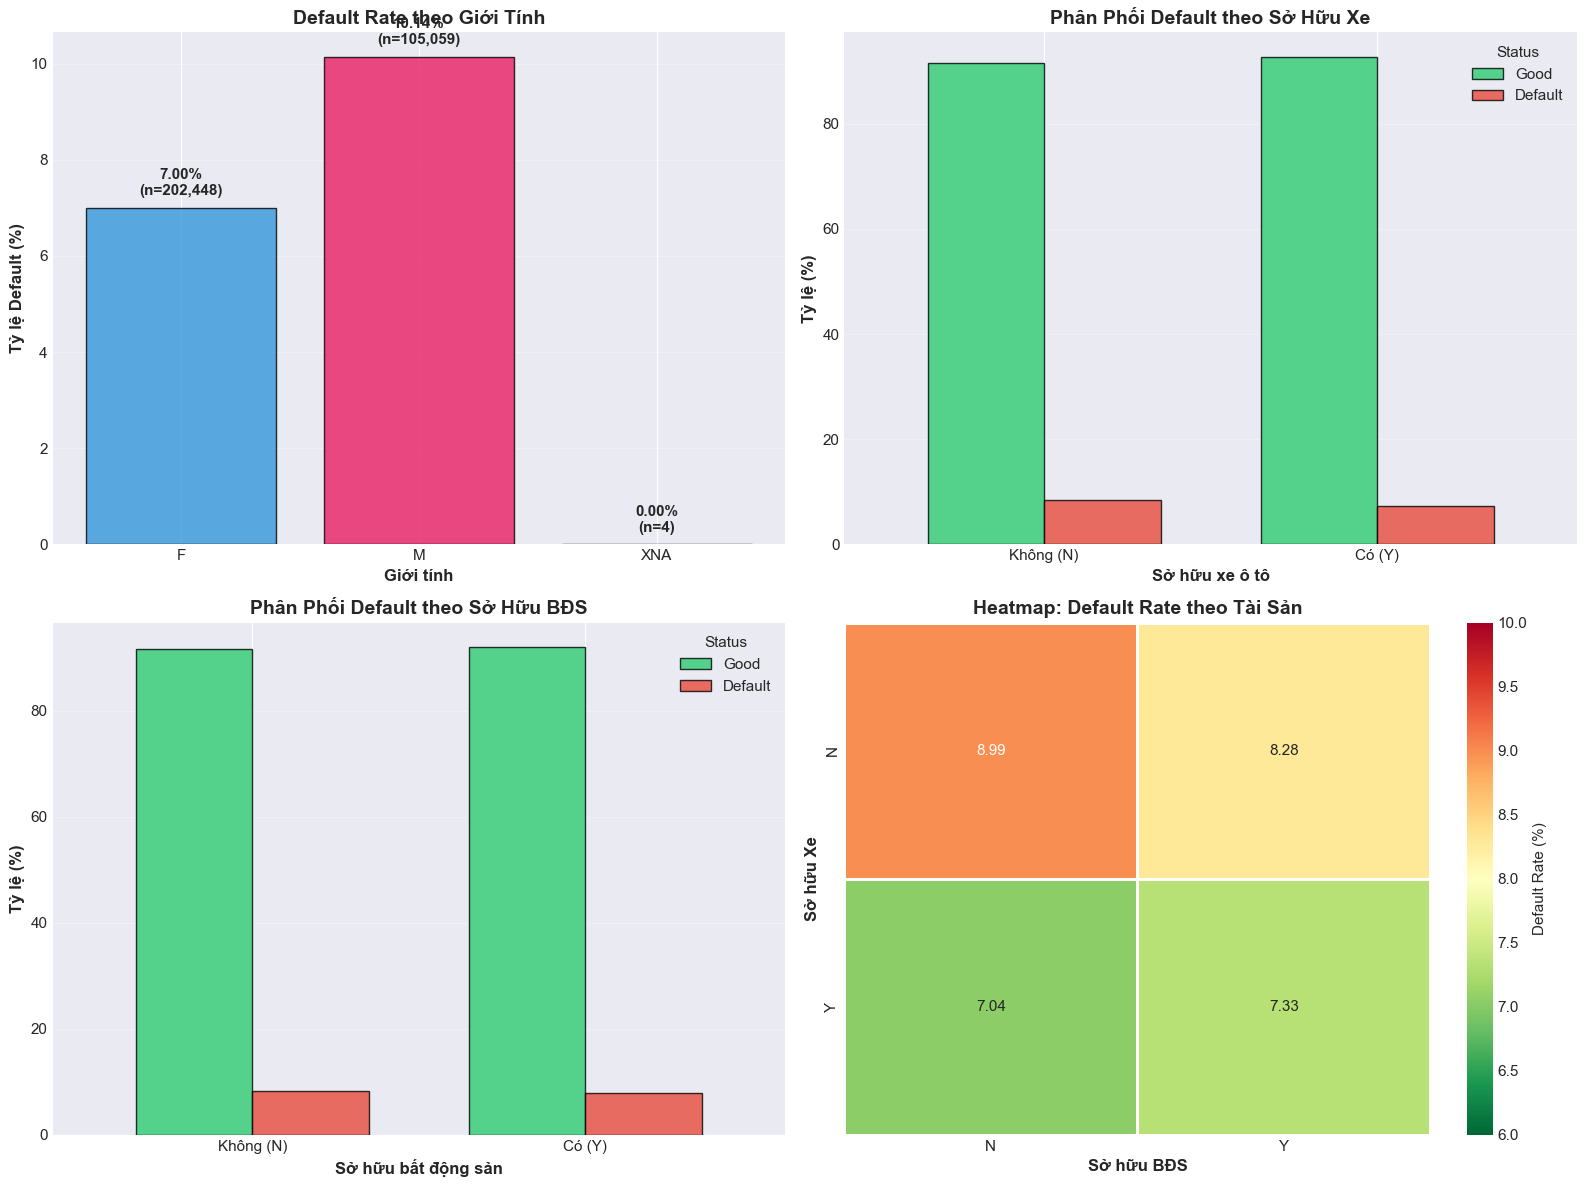

In [33]:
# Phân tích kết hợp Gender, Car, Realty
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Gender vs Default Rate
gender_default = df.groupby('CODE_GENDER')['TARGET'].agg(['mean', 'count']).reset_index()
gender_default['mean'] = gender_default['mean'] * 100

ax1 = axes[0, 0]
bars = ax1.bar(gender_default['CODE_GENDER'], gender_default['mean'], 
               color=['#3498db', '#e91e63', '#9b59b6'], alpha=0.8, edgecolor='black')
ax1.set_ylabel('Tỷ lệ Default (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Giới tính', fontsize=12, fontweight='bold')
ax1.set_title('Default Rate theo Giới Tính', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for i, (bar, row) in enumerate(zip(bars, gender_default.itertuples())):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{height:.2f}%\n(n={row.count:,})',
             ha='center', va='bottom', fontweight='bold')

# Subplot 2: Car Ownership vs Default
car_default = df.groupby(['FLAG_OWN_CAR', 'TARGET']).size().unstack()
car_default_pct = (car_default.div(car_default.sum(axis=1), axis=0) * 100)

ax2 = axes[0, 1]
car_default_pct.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c'], 
                     alpha=0.8, edgecolor='black', width=0.7)
ax2.set_xlabel('Sở hữu xe ô tô', fontsize=12, fontweight='bold')
ax2.set_ylabel('Tỷ lệ (%)', fontsize=12, fontweight='bold')
ax2.set_title('Phân Phối Default theo Sở Hữu Xe', fontsize=14, fontweight='bold')
ax2.legend(['Good', 'Default'], title='Status', loc='upper right')
ax2.set_xticklabels(['Không (N)', 'Có (Y)'], rotation=0)
ax2.grid(axis='y', alpha=0.3)

# Subplot 3: Realty Ownership vs Default
realty_default = df.groupby(['FLAG_OWN_REALTY', 'TARGET']).size().unstack()
realty_default_pct = (realty_default.div(realty_default.sum(axis=1), axis=0) * 100)

ax3 = axes[1, 0]
realty_default_pct.plot(kind='bar', ax=ax3, color=['#2ecc71', '#e74c3c'],
                        alpha=0.8, edgecolor='black', width=0.7)
ax3.set_xlabel('Sở hữu bất động sản', fontsize=12, fontweight='bold')
ax3.set_ylabel('Tỷ lệ (%)', fontsize=12, fontweight='bold')
ax3.set_title('Phân Phối Default theo Sở Hữu BĐS', fontsize=14, fontweight='bold')
ax3.legend(['Good', 'Default'], title='Status', loc='upper right')
ax3.set_xticklabels(['Không (N)', 'Có (Y)'], rotation=0)
ax3.grid(axis='y', alpha=0.3)

# Subplot 4: Combination heatmap
combo_default = df.groupby(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])['TARGET'].mean() * 100
combo_matrix = combo_default.unstack()

ax4 = axes[1, 1]
sns.heatmap(combo_matrix, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            center=8, vmin=6, vmax=10, ax=ax4, cbar_kws={'label': 'Default Rate (%)'},
            linewidths=2, linecolor='white')
ax4.set_xlabel('Sở hữu BĐS', fontsize=12, fontweight='bold')
ax4.set_ylabel('Sở hữu Xe', fontsize=12, fontweight='bold')
ax4.set_title('Heatmap: Default Rate theo Tài Sản', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('02_gender_assets_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

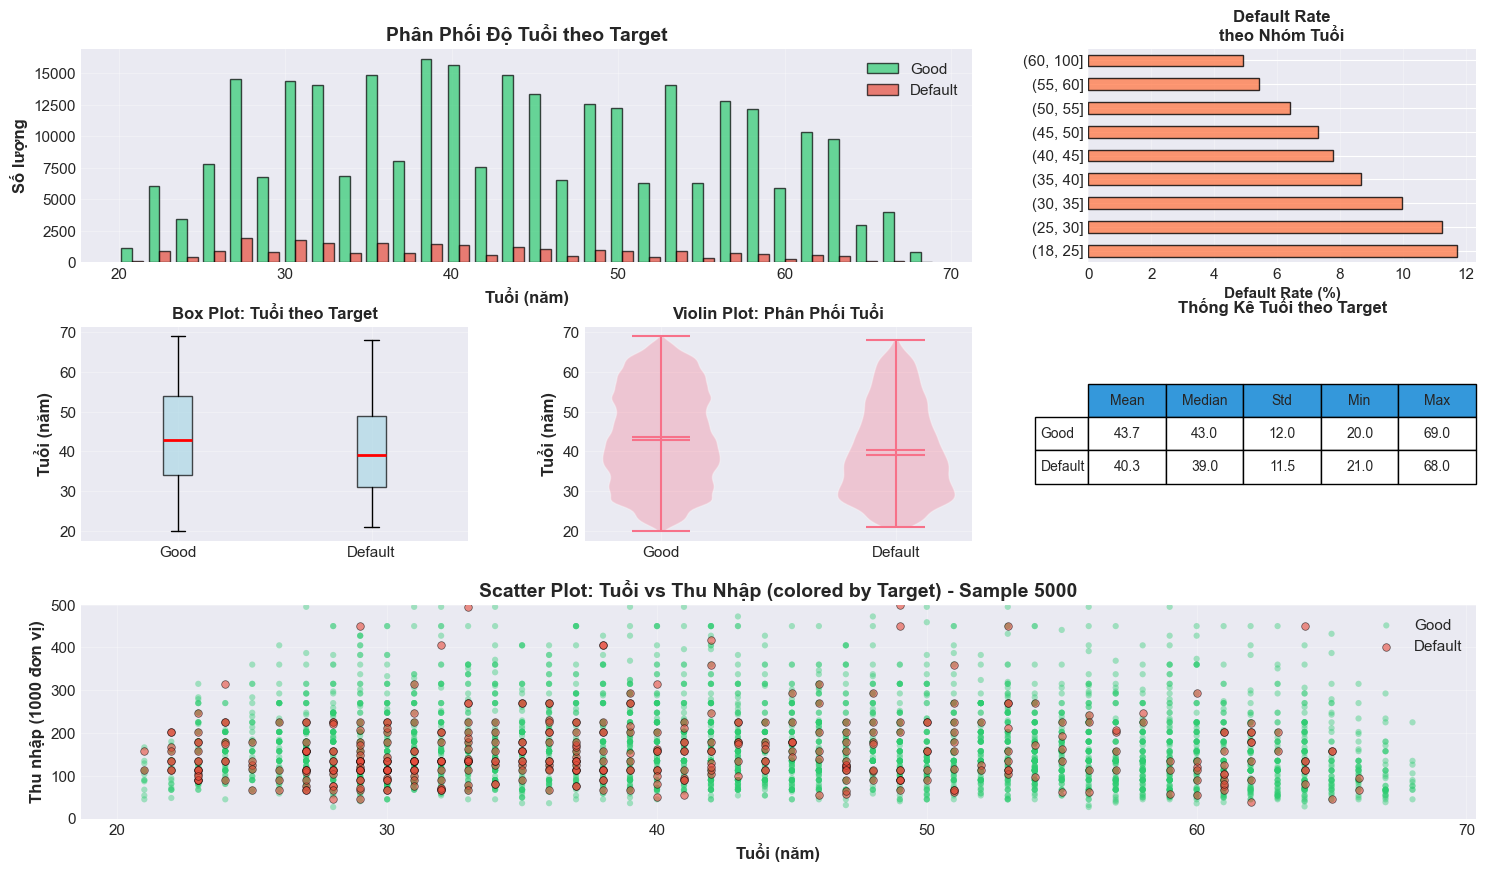

In [34]:
# Phân tích sâu về độ tuổi
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Distribution của Age
ax1 = fig.add_subplot(gs[0, :2])
df_good = df[df['TARGET'] == 0]
df_bad = df[df['TARGET'] == 1]

ax1.hist([df_good['AGE_YEARS'], df_bad['AGE_YEARS']], bins=30, 
         label=['Good', 'Default'], color=['#2ecc71', '#e74c3c'], 
         alpha=0.7, edgecolor='black')
ax1.set_xlabel('Tuổi (năm)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Số lượng', fontsize=12, fontweight='bold')
ax1.set_title('Phân Phối Độ Tuổi theo Target', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3)

# 2. Default rate by age groups
ax2 = fig.add_subplot(gs[0, 2])
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 100]
df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=age_bins)
age_default = df.groupby('AGE_GROUP')['TARGET'].mean() * 100

age_default.plot(kind='barh', ax=ax2, color='coral', alpha=0.8, edgecolor='black')
ax2.set_xlabel('Default Rate (%)', fontsize=11, fontweight='bold')
ax2.set_ylabel('')
ax2.set_title('Default Rate\ntheo Nhóm Tuổi', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3. Box plot: Age by Target
ax3 = fig.add_subplot(gs[1, 0])
bp = ax3.boxplot([df_good['AGE_YEARS'], df_bad['AGE_YEARS']], 
                  labels=['Good', 'Default'],
                  patch_artist=True,
                  medianprops=dict(color='red', linewidth=2),
                  boxprops=dict(facecolor='lightblue', alpha=0.7))
ax3.set_ylabel('Tuổi (năm)', fontsize=12, fontweight='bold')
ax3.set_title('Box Plot: Tuổi theo Target', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

# 4. Violin plot
ax4 = fig.add_subplot(gs[1, 1])
parts = ax4.violinplot([df_good['AGE_YEARS'], df_bad['AGE_YEARS']], 
                       positions=[1, 2], showmeans=True, showmedians=True)
ax4.set_xticks([1, 2])
ax4.set_xticklabels(['Good', 'Default'])
ax4.set_ylabel('Tuổi (năm)', fontsize=12, fontweight='bold')
ax4.set_title('Violin Plot: Phân Phối Tuổi', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

# 5. Age statistics table
ax5 = fig.add_subplot(gs[1, 2])
age_stats = df.groupby('TARGET')['AGE_YEARS'].describe()[['mean', '50%', 'std', 'min', 'max']]
age_stats.index = ['Good', 'Default']
age_stats = age_stats.round(1)

ax5.axis('tight')
ax5.axis('off')
table = ax5.table(cellText=age_stats.values, 
                  rowLabels=age_stats.index,
                  colLabels=['Mean', 'Median', 'Std', 'Min', 'Max'],
                  cellLoc='center', loc='center',
                  colColours=['#3498db']*5)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
ax5.set_title('Thống Kê Tuổi theo Target', fontsize=12, fontweight='bold', pad=10)

# 6. Scatter: Age vs Income colored by Target
ax6 = fig.add_subplot(gs[2, :])
sample = df.sample(n=5000, random_state=42)
scatter_good = sample[sample['TARGET'] == 0]
scatter_bad = sample[sample['TARGET'] == 1]

ax6.scatter(scatter_good['AGE_YEARS'], scatter_good['AMT_INCOME_TOTAL']/1000, 
           alpha=0.4, s=20, c='#2ecc71', label='Good', edgecolors='none')
ax6.scatter(scatter_bad['AGE_YEARS'], scatter_bad['AMT_INCOME_TOTAL']/1000, 
           alpha=0.6, s=30, c='#e74c3c', label='Default', edgecolors='black', linewidth=0.5)
ax6.set_xlabel('Tuổi (năm)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Thu nhập (1000 đơn vị)', fontsize=12, fontweight='bold')
ax6.set_title('Scatter Plot: Tuổi vs Thu Nhập (colored by Target) - Sample 5000', 
             fontsize=14, fontweight='bold')
ax6.legend(fontsize=11)
ax6.grid(alpha=0.3)
ax6.set_ylim(0, 500)

plt.savefig('03_age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

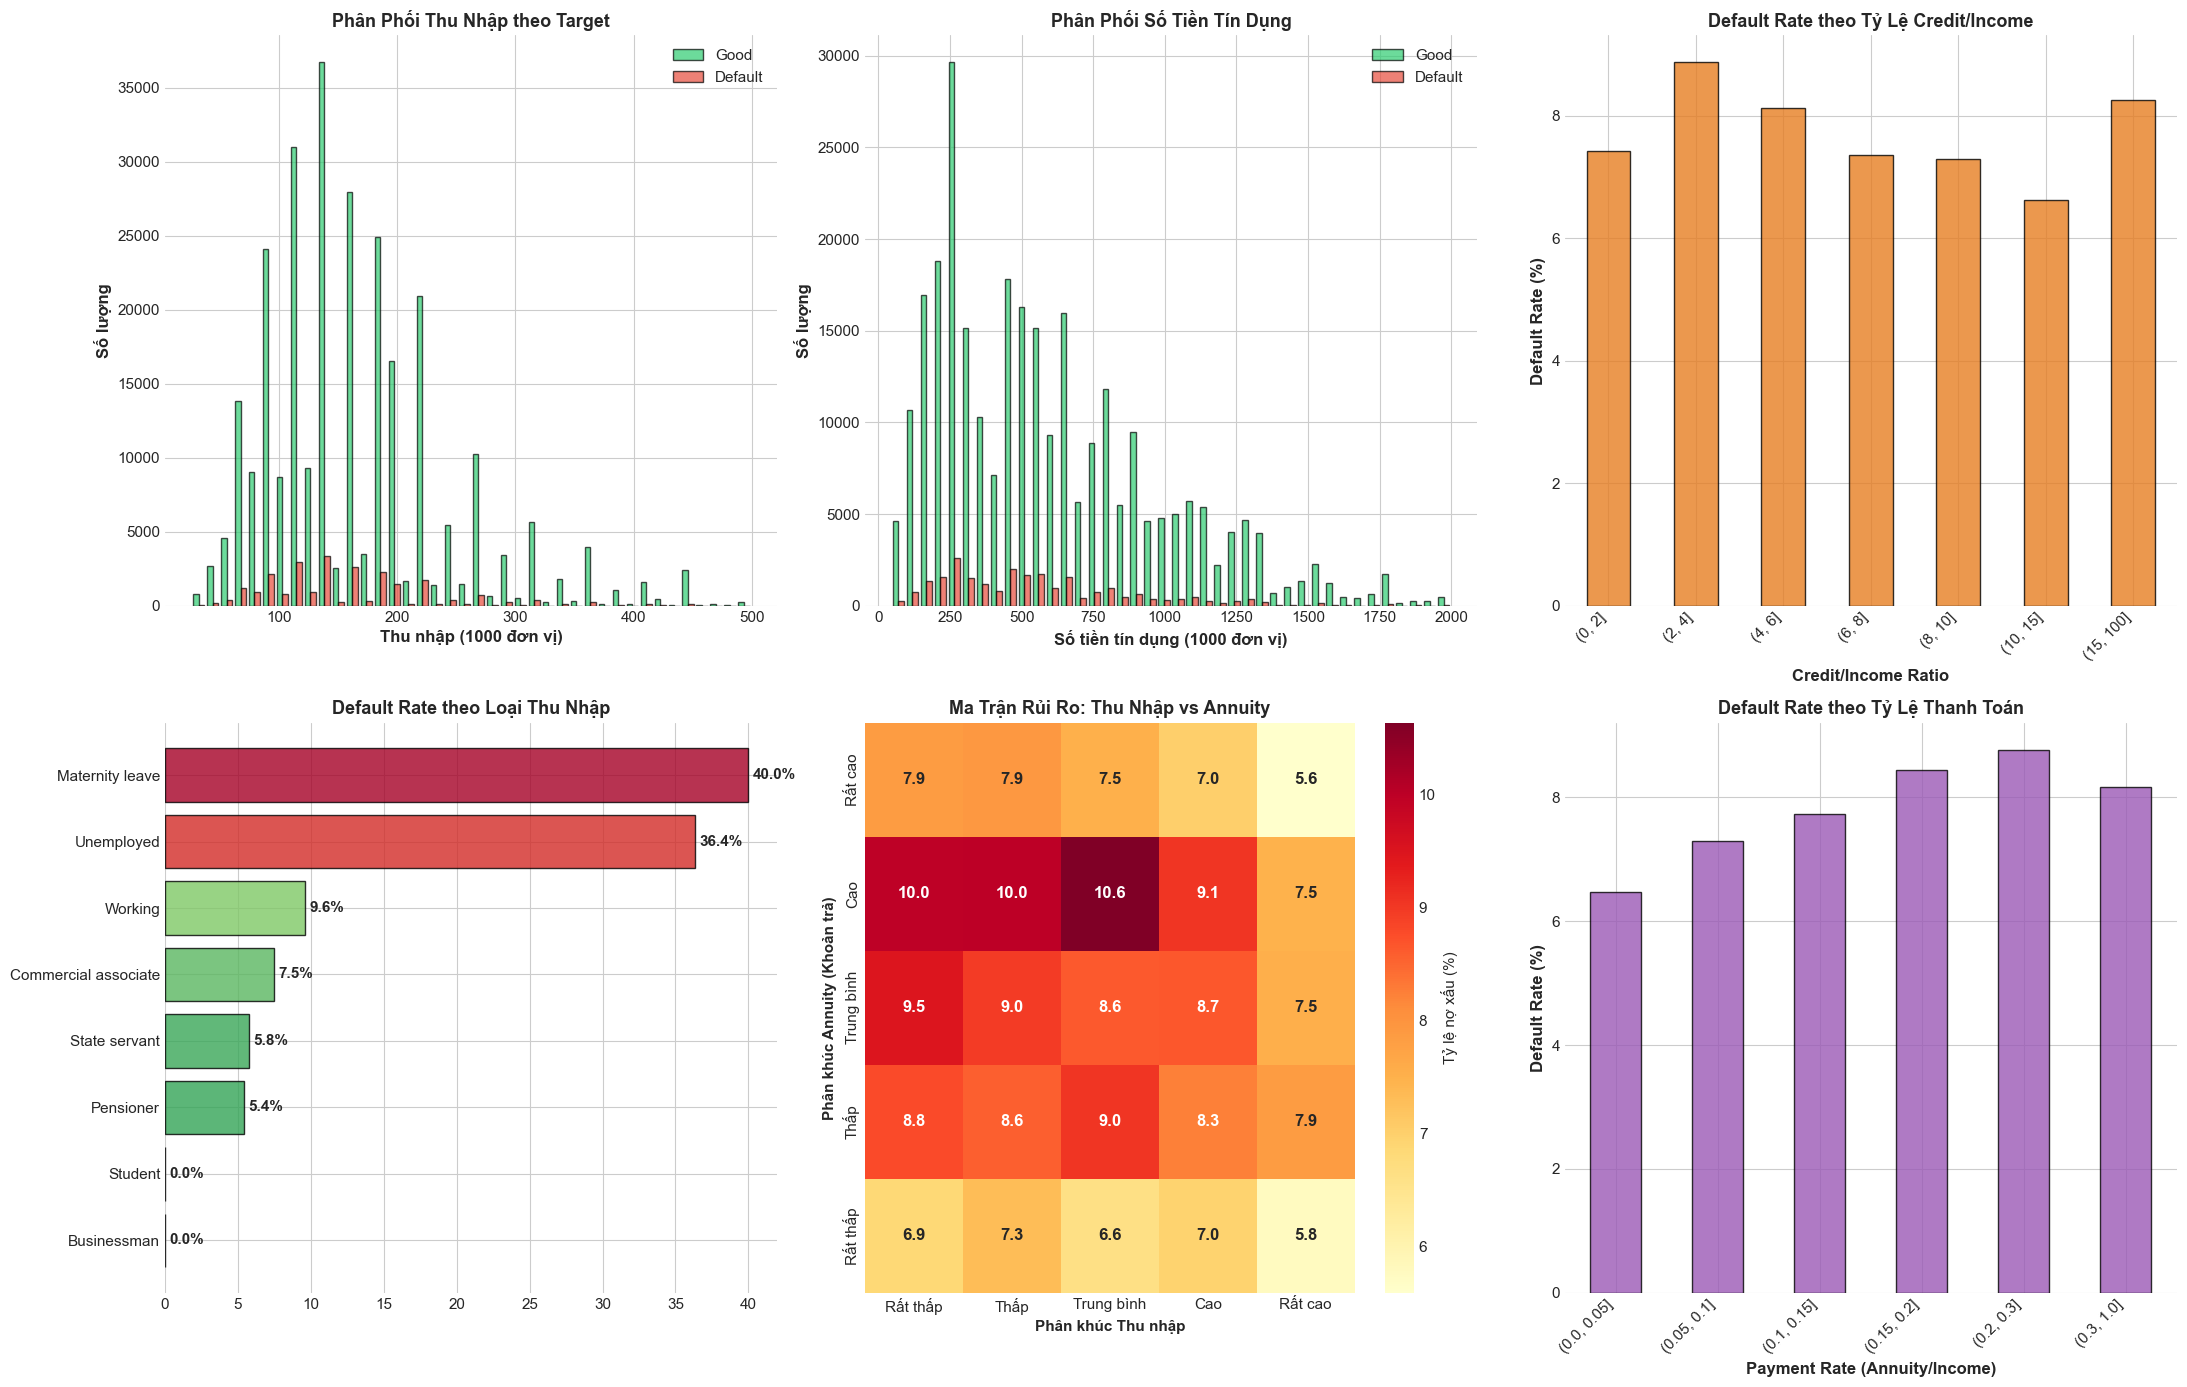

In [36]:
# Thiết lập style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(22, 14))

# 1. Income distribution by Target (GIỮ NGUYÊN)
ax1 = axes[0, 0]
df_plot = df[df['AMT_INCOME_TOTAL'] < 500000]
ax1.hist([df_plot[df_plot['TARGET']==0]['AMT_INCOME_TOTAL']/1000,
          df_plot[df_plot['TARGET']==1]['AMT_INCOME_TOTAL']/1000],
          bins=40, label=['Good', 'Default'], 
          color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax1.set_xlabel('Thu nhập (1000 đơn vị)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Số lượng', fontsize=12, fontweight='bold')
ax1.set_title('Phân Phối Thu Nhập theo Target', fontsize=13, fontweight='bold')
ax1.legend()

# 2. Credit amount distribution (GIỮ NGUYÊN)
ax2 = axes[0, 1]
df_plot2 = df[df['AMT_CREDIT'] < 2000000]
ax2.hist([df_plot2[df_plot2['TARGET']==0]['AMT_CREDIT']/1000,
          df_plot2[df_plot2['TARGET']==1]['AMT_CREDIT']/1000],
          bins=40, label=['Good', 'Default'],
          color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax2.set_xlabel('Số tiền tín dụng (1000 đơn vị)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Số lượng', fontsize=12, fontweight='bold')
ax2.set_title('Phân Phối Số Tiền Tín Dụng', fontsize=13, fontweight='bold')
ax2.legend()

# 3. Credit to Income ratio analysis (GIỮ NGUYÊN)
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
ax3 = axes[0, 2]
ratio_bins = [0, 2, 4, 6, 8, 10, 15, 100]
df['RATIO_GROUP'] = pd.cut(df['CREDIT_INCOME_RATIO'], bins=ratio_bins)
ratio_default = df.groupby('RATIO_GROUP')['TARGET'].mean() * 100
ratio_default.plot(kind='bar', ax=ax3, color='#e67e22', alpha=0.8, edgecolor='black')
ax3.set_xlabel('Credit/Income Ratio', fontsize=12, fontweight='bold')
ax3.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax3.set_title('Default Rate theo Tỷ Lệ Credit/Income', fontsize=13, fontweight='bold')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# 4. Income type analysis (GIỮ NGUYÊN)
ax4 = axes[1, 0]
income_type_default = df.groupby('NAME_INCOME_TYPE')['TARGET'].agg(['mean', 'count'])
income_type_default['mean'] = income_type_default['mean'] * 100
income_type_default = income_type_default.sort_values('mean', ascending=True)
ax4.barh(range(len(income_type_default)), income_type_default['mean'],
         color=plt.cm.RdYlGn_r(income_type_default['mean']/income_type_default['mean'].max()),
         alpha=0.8, edgecolor='black')
ax4.set_yticks(range(len(income_type_default)))
ax4.set_yticklabels(income_type_default.index)
ax4.set_title('Default Rate theo Loại Thu Nhập', fontsize=13, fontweight='bold')
for i, (idx, row) in enumerate(income_type_default.iterrows()):
    ax4.text(row['mean'] + 0.3, i, f"{row['mean']:.1f}%", va='center', fontweight='bold')

# --- 5. THAY THẾ: Heatmap Tỷ lệ nợ xấu theo Thu nhập & Annuity ---
ax5 = axes[1, 1]
# Chia dữ liệu thành 5 nhóm bằng nhau (Quantiles) để tránh bị lệch bởi outlier
df['INC_QUINTILE'] = pd.qcut(df['AMT_INCOME_TOTAL'], 5, labels=['Rất thấp', 'Thấp', 'Trung bình', 'Cao', 'Rất cao'])
df['ANN_QUINTILE'] = pd.qcut(df['AMT_ANNUITY'], 5, labels=['Rất thấp', 'Thấp', 'Trung bình', 'Cao', 'Rất cao'])

# Tạo bảng xoay tính tỷ lệ nợ xấu (%)
heatmap_data = df.pivot_table(index='ANN_QUINTILE', columns='INC_QUINTILE', values='TARGET', aggfunc='mean') * 100

# Vẽ Heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", ax=ax5, 
            cbar_kws={'label': 'Tỷ lệ nợ xấu (%)'}, annot_kws={"weight": "bold", "size": 12})
ax5.invert_yaxis() # Để "Rất cao" nằm ở trên cùng
ax5.set_title('Ma Trận Rủi Ro: Thu Nhập vs Annuity', fontsize=13, fontweight='bold')
ax5.set_xlabel('Phân khúc Thu nhập', fontsize=11, fontweight='bold')
ax5.set_ylabel('Phân khúc Annuity (Khoản trả)', fontsize=11, fontweight='bold')

# 6. Payment burden (GIỮ NGUYÊN)
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
ax6 = axes[1, 2]
payment_bins = [0, 0.05, 0.1, 0.15, 0.2, 0.3, 1]
df['PAYMENT_GROUP'] = pd.cut(df['PAYMENT_RATE'], bins=payment_bins)
payment_default = df.groupby('PAYMENT_GROUP')['TARGET'].mean() * 100
payment_default.plot(kind='bar', ax=ax6, color='#9b59b6', alpha=0.8, edgecolor='black')
ax6.set_xlabel('Payment Rate (Annuity/Income)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax6.set_title('Default Rate theo Tỷ Lệ Thanh Toán', fontsize=13, fontweight='bold')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('04_financial_analysis_updated.png', dpi=300, bbox_inches='tight')
plt.show()

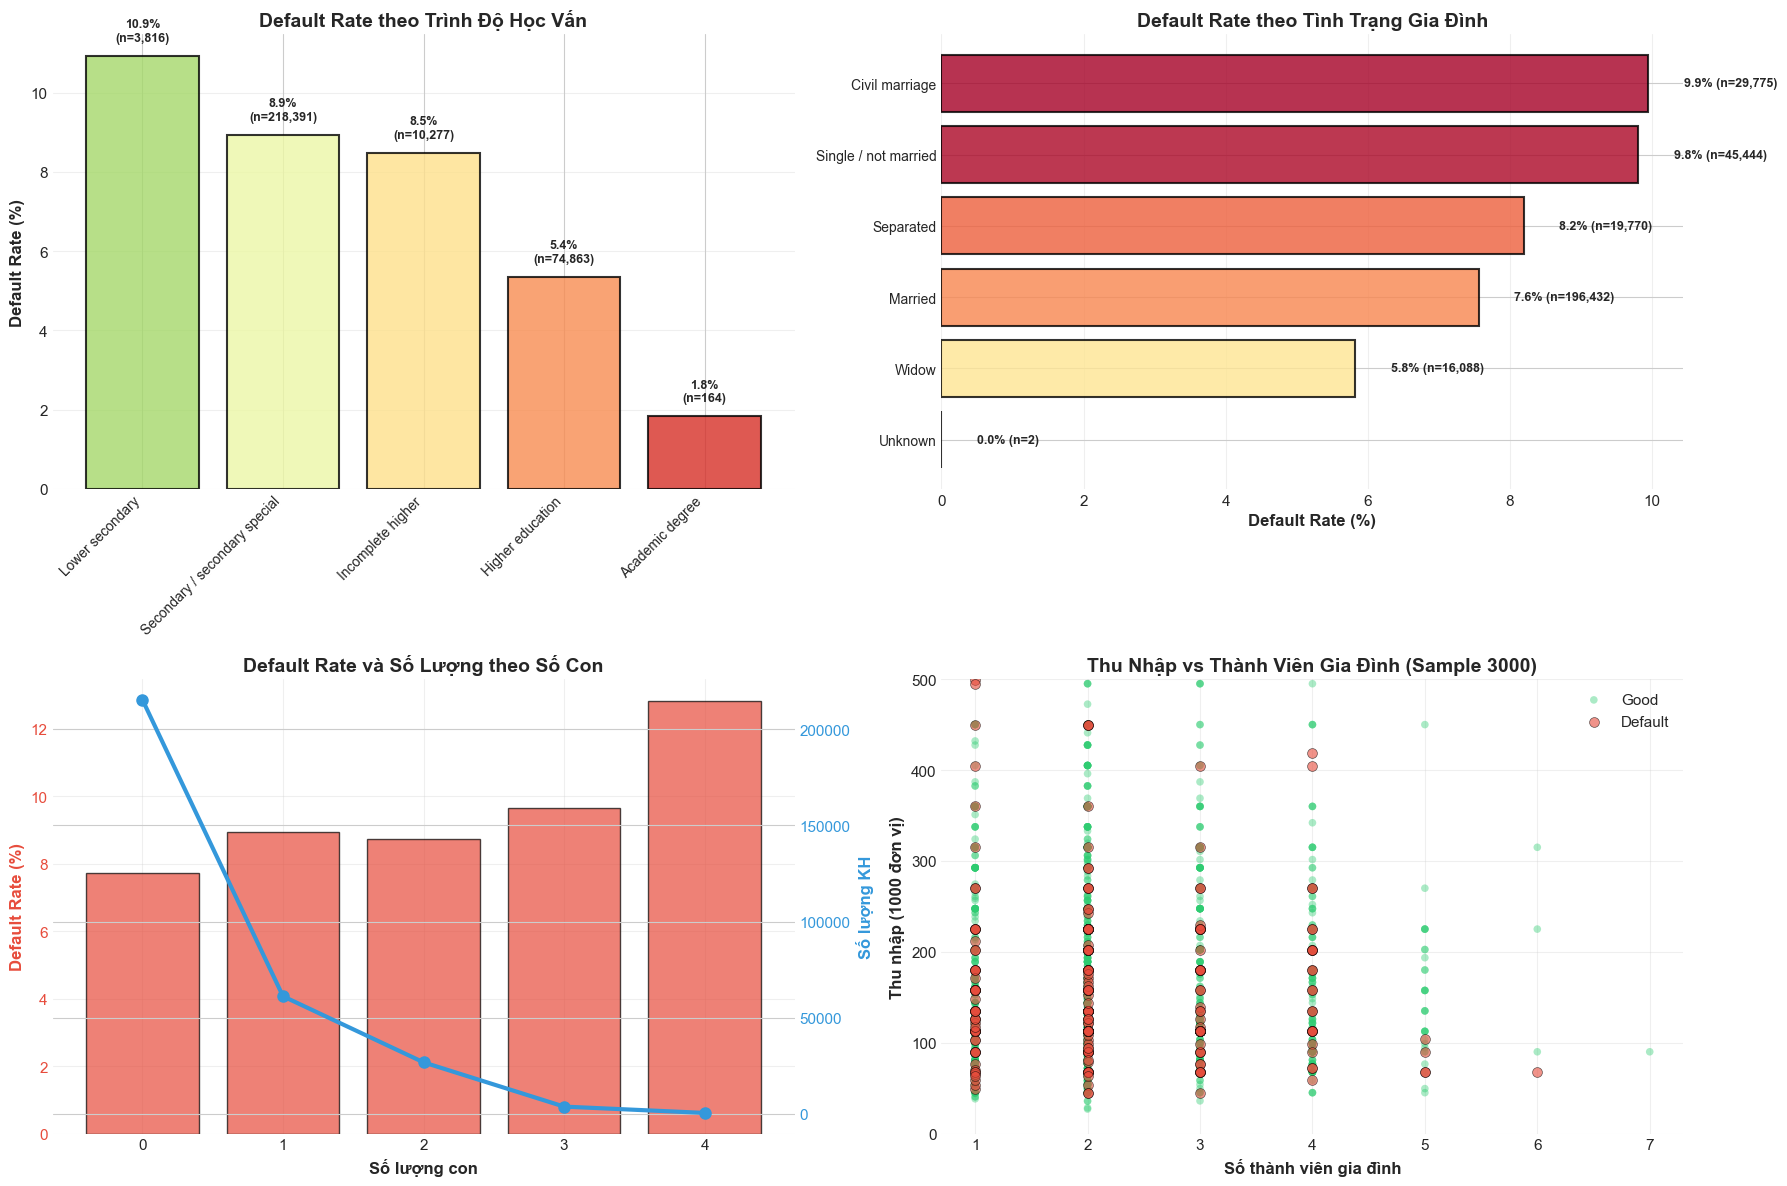

In [37]:
# Education and Family analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Education level analysis
ax1 = axes[0, 0]
edu_default = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(['mean', 'count'])
edu_default['mean'] = edu_default['mean'] * 100
edu_default = edu_default.sort_values('mean', ascending=False)

colors_edu = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(edu_default)))
bars = ax1.bar(range(len(edu_default)), edu_default['mean'], 
               color=colors_edu, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_xticks(range(len(edu_default)))
ax1.set_xticklabels(edu_default.index, rotation=45, ha='right', fontsize=10)
ax1.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Default Rate theo Trình Độ Học Vấn', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(edu_default.iterrows()):
    ax1.text(i, row['mean'] + 0.3, f"{row['mean']:.1f}%\n(n={int(row['count']):,})",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Family status analysis
ax2 = axes[0, 1]
family_default = df.groupby('NAME_FAMILY_STATUS')['TARGET'].agg(['mean', 'count'])
family_default['mean'] = family_default['mean'] * 100
family_default = family_default.sort_values('mean', ascending=True)

bars = ax2.barh(range(len(family_default)), family_default['mean'],
                color=plt.cm.RdYlGn_r(family_default['mean']/family_default['mean'].max()),
                alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(family_default)))
ax2.set_yticklabels(family_default.index, fontsize=10)
ax2.set_xlabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Default Rate theo Tình Trạng Gia Đình', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(family_default.iterrows()):
    ax2.text(row['mean'] + 0.5, i, f"{row['mean']:.1f}% (n={int(row['count']):,})",
             va='center', fontsize=9, fontweight='bold')

# 3. Number of children analysis
ax3 = axes[1, 0]
children_default = df.groupby('CNT_CHILDREN')['TARGET'].agg(['mean', 'count'])
children_default['mean'] = children_default['mean'] * 100
children_default = children_default[children_default['count'] > 100]  # Filter low count

ax3_twin = ax3.twinx()
bars = ax3.bar(children_default.index, children_default['mean'], 
               color='#e74c3c', alpha=0.7, edgecolor='black', label='Default Rate')
line = ax3_twin.plot(children_default.index, children_default['count'], 
                     color='#3498db', marker='o', linewidth=3, markersize=8, label='Count')

ax3.set_xlabel('Số lượng con', fontsize=12, fontweight='bold')
ax3.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold', color='#e74c3c')
ax3_twin.set_ylabel('Số lượng KH', fontsize=12, fontweight='bold', color='#3498db')
ax3.set_title('Default Rate và Số Lượng theo Số Con', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3)
ax3.tick_params(axis='y', labelcolor='#e74c3c')
ax3_twin.tick_params(axis='y', labelcolor='#3498db')

# 4. Family members vs Income (colored by target)
ax4 = axes[1, 1]
sample = df.sample(n=3000, random_state=42)
scatter_good = sample[sample['TARGET'] == 0]
scatter_bad = sample[sample['TARGET'] == 1]

ax4.scatter(scatter_good['CNT_FAM_MEMBERS'], scatter_good['AMT_INCOME_TOTAL']/1000,
           alpha=0.4, s=30, c='#2ecc71', label='Good', edgecolors='none')
ax4.scatter(scatter_bad['CNT_FAM_MEMBERS'], scatter_bad['AMT_INCOME_TOTAL']/1000,
           alpha=0.6, s=50, c='#e74c3c', label='Default', edgecolors='black', linewidth=0.5)
ax4.set_xlabel('Số thành viên gia đình', fontsize=12, fontweight='bold')
ax4.set_ylabel('Thu nhập (1000 đơn vị)', fontsize=12, fontweight='bold')
ax4.set_title('Thu Nhập vs Thành Viên Gia Đình (Sample 3000)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=11)
ax4.grid(alpha=0.3)
ax4.set_ylim(0, 500)

plt.tight_layout()
plt.savefig('05_education_family.png', dpi=300, bbox_inches='tight')
plt.show()

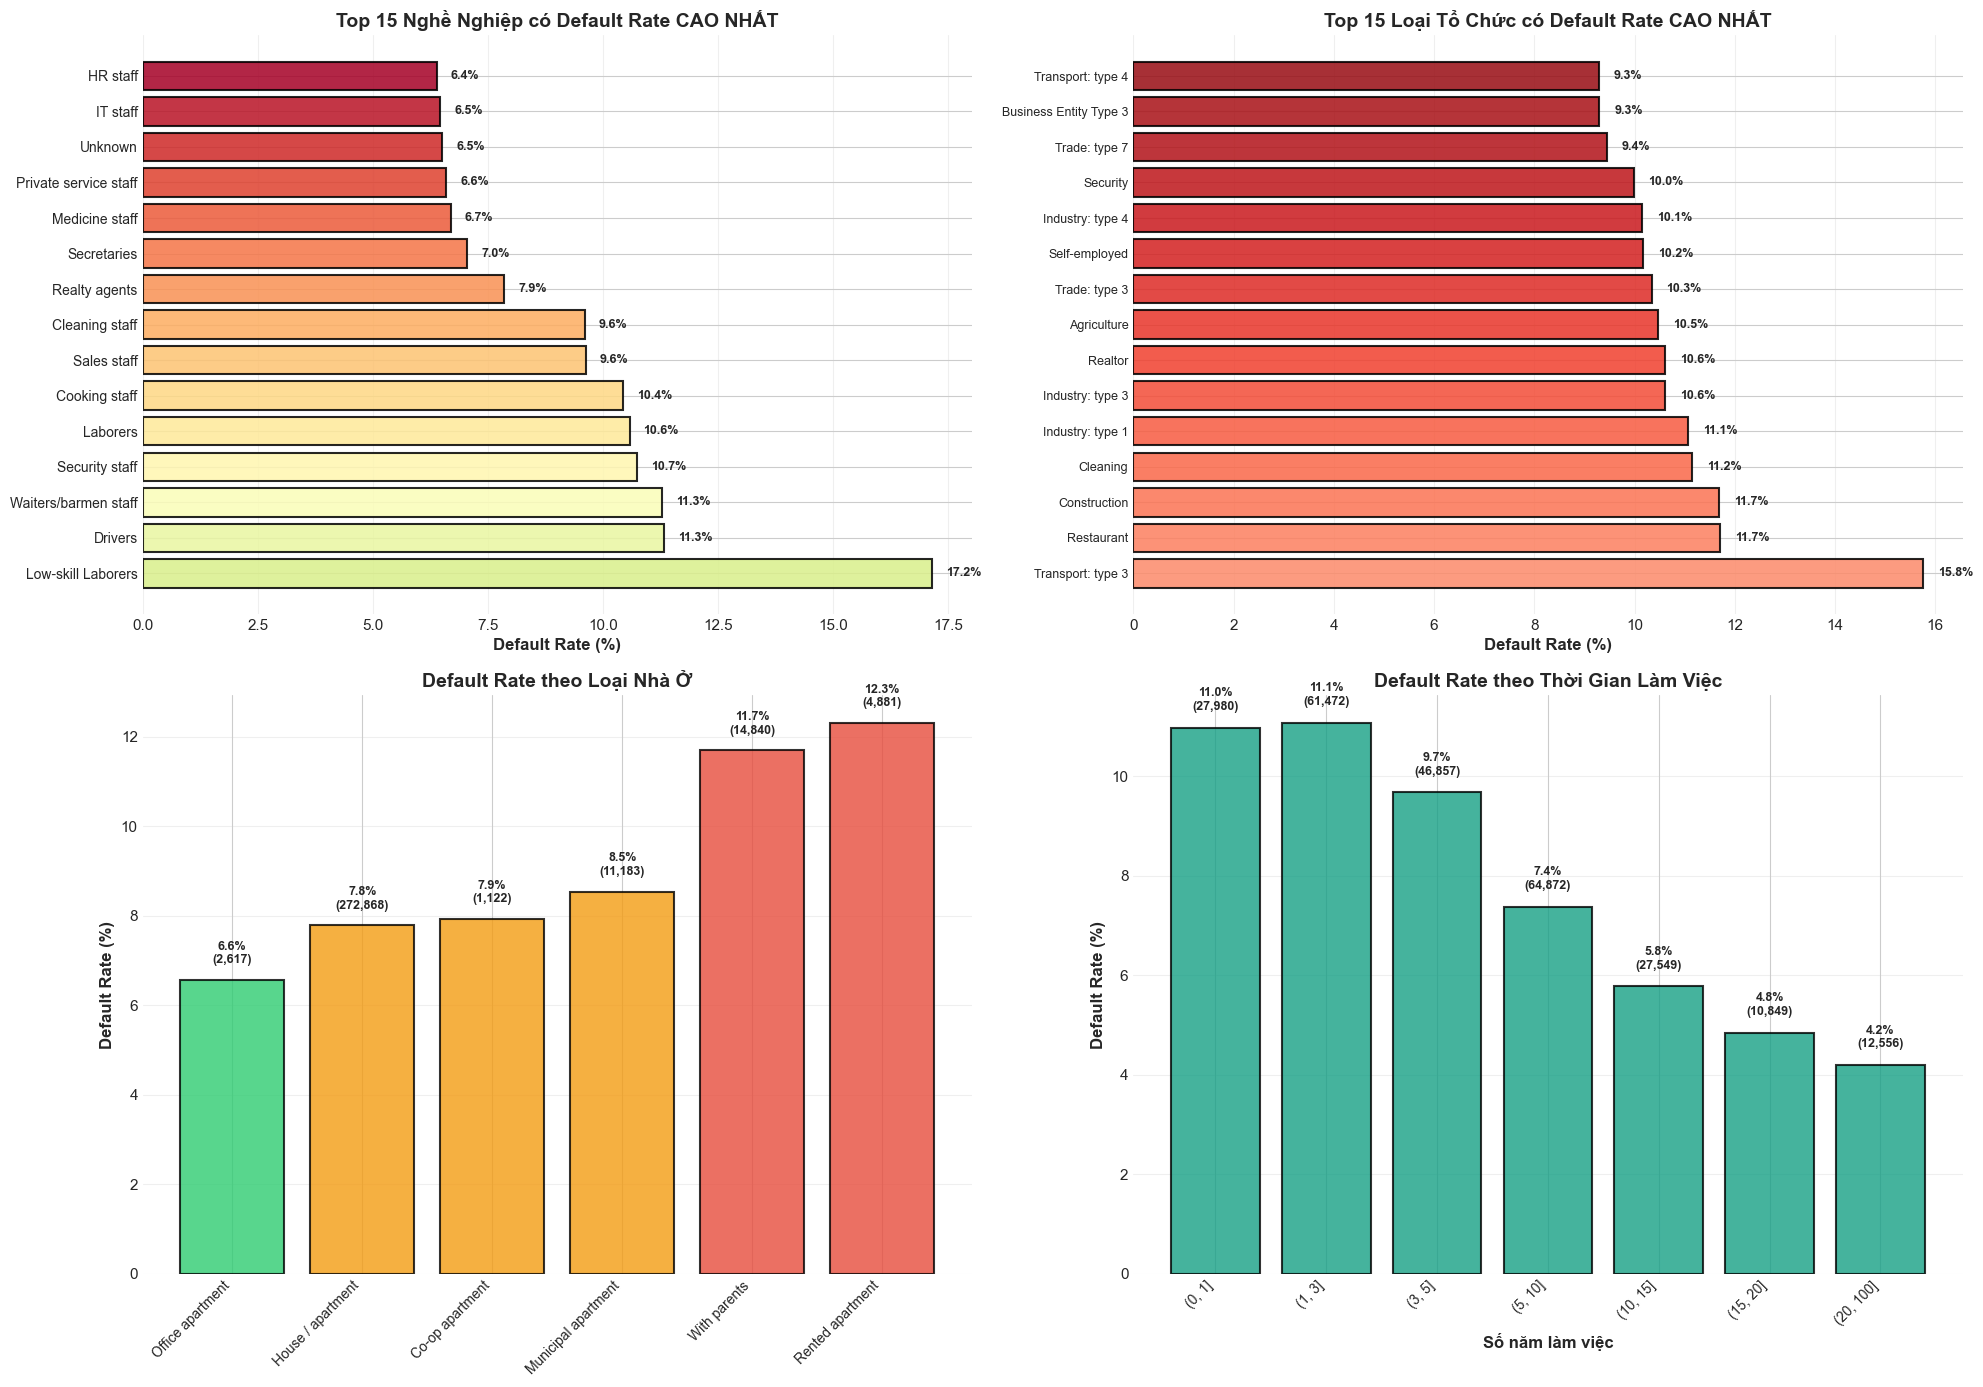

In [38]:
# Occupation and Organization analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# 1. Top 15 Occupation types by default rate
ax1 = axes[0, 0]
occ_default = df.groupby('OCCUPATION_TYPE')['TARGET'].agg(['mean', 'count'])
occ_default['mean'] = occ_default['mean'] * 100
occ_default = occ_default[occ_default['count'] > 500].sort_values('mean', ascending=False).head(15)

bars = ax1.barh(range(len(occ_default)), occ_default['mean'],
                color=plt.cm.RdYlGn_r(np.linspace(0.4, 1, len(occ_default))),
                alpha=0.85, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(occ_default)))
ax1.set_yticklabels(occ_default.index, fontsize=10)
ax1.set_xlabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Nghề Nghiệp có Default Rate CAO NHẤT', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(occ_default.iterrows()):
    ax1.text(row['mean'] + 0.3, i, f"{row['mean']:.1f}%",
             va='center', fontsize=9, fontweight='bold')

# 2. Top 15 Organization types by default rate
ax2 = axes[0, 1]
org_default = df.groupby('ORGANIZATION_TYPE')['TARGET'].agg(['mean', 'count'])
org_default['mean'] = org_default['mean'] * 100
org_default = org_default[org_default['count'] > 200].sort_values('mean', ascending=False).head(15)

bars = ax2.barh(range(len(org_default)), org_default['mean'],
                color=plt.cm.Reds(np.linspace(0.4, 0.9, len(org_default))),
                alpha=0.85, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(org_default)))
ax2.set_yticklabels(org_default.index, fontsize=9)
ax2.set_xlabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Top 15 Loại Tổ Chức có Default Rate CAO NHẤT', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(org_default.iterrows()):
    ax2.text(row['mean'] + 0.3, i, f"{row['mean']:.1f}%",
             va='center', fontsize=9, fontweight='bold')

# 3. Housing type analysis
ax3 = axes[1, 0]
house_default = df.groupby('NAME_HOUSING_TYPE')['TARGET'].agg(['mean', 'count'])
house_default['mean'] = house_default['mean'] * 100
house_default = house_default.sort_values('mean', ascending=True)

colors_house = ['#2ecc71' if x < 7 else '#f39c12' if x < 9 else '#e74c3c' 
                for x in house_default['mean']]
bars = ax3.bar(range(len(house_default)), house_default['mean'],
               color=colors_house, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_xticks(range(len(house_default)))
ax3.set_xticklabels(house_default.index, rotation=45, ha='right', fontsize=10)
ax3.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax3.set_title('Default Rate theo Loại Nhà Ở', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(house_default.iterrows()):
    ax3.text(i, row['mean'] + 0.3, f"{row['mean']:.1f}%\n({int(row['count']):,})",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# 4. Employment length analysis (for those employed)
ax4 = axes[1, 1]
df_employed = df[df['DAYS_EMPLOYED'].notna() & (df['DAYS_EMPLOYED'] > 0)].copy()
df_employed['YEARS_EMPLOYED'] = df_employed['DAYS_EMPLOYED'] / 365

employ_bins = [0, 1, 3, 5, 10, 15, 20, 100]
df_employed['EMPLOY_GROUP'] = pd.cut(df_employed['YEARS_EMPLOYED'], bins=employ_bins)
employ_default = df_employed.groupby('EMPLOY_GROUP')['TARGET'].agg(['mean', 'count'])
employ_default['mean'] = employ_default['mean'] * 100

bars = ax4.bar(range(len(employ_default)), employ_default['mean'],
               color='#16a085', alpha=0.8, edgecolor='black', linewidth=1.5)
ax4.set_xticks(range(len(employ_default)))
ax4.set_xticklabels([str(x) for x in employ_default.index], rotation=45, ha='right', fontsize=10)
ax4.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Số năm làm việc', fontsize=12, fontweight='bold')
ax4.set_title('Default Rate theo Thời Gian Làm Việc', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(employ_default.iterrows()):
    ax4.text(i, row['mean'] + 0.3, f"{row['mean']:.1f}%\n({int(row['count']):,})",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('06_occupation_organization.png', dpi=300, bbox_inches='tight')
plt.show()

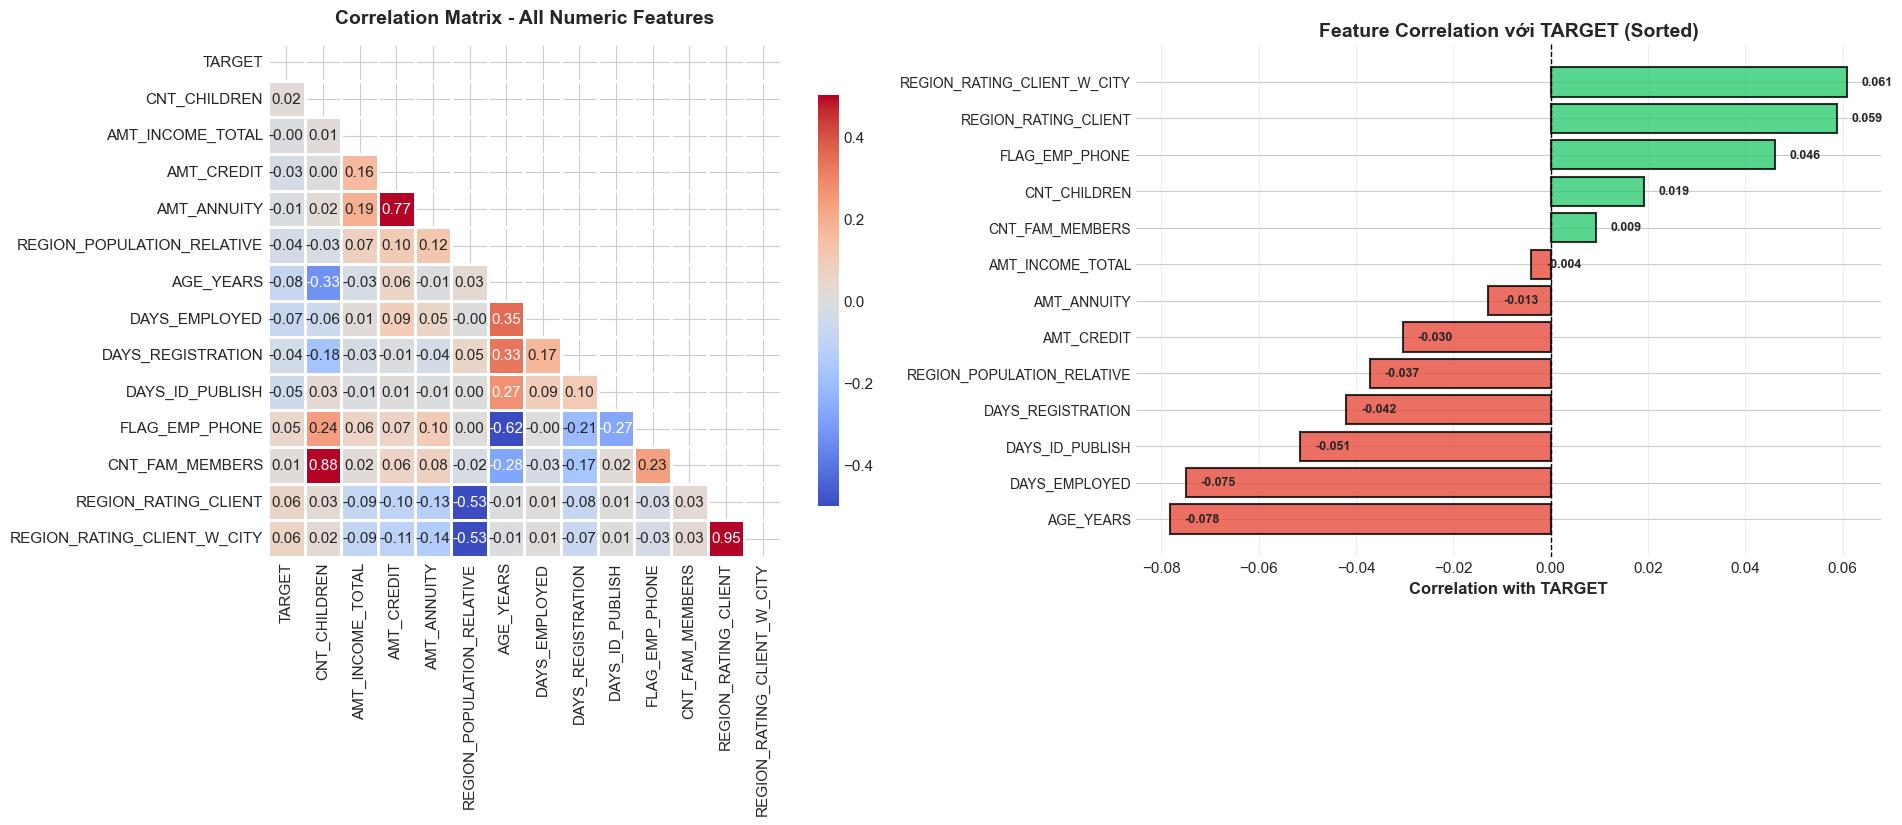

In [39]:
# Correlation analysis
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Select numeric columns
numeric_cols = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 
                'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AGE_YEARS',
                'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                'REGION_RATING_CLIENT_W_CITY']

# 1. Full correlation matrix
ax1 = axes[0]
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax1, vmin=-0.5, vmax=0.5)
ax1.set_title('Correlation Matrix - All Numeric Features', fontsize=14, fontweight='bold', pad=15)

# 2. Correlation with TARGET (sorted)
ax2 = axes[1]
target_corr = df[numeric_cols].corr()['TARGET'].drop('TARGET').sort_values(ascending=True)
colors_corr = ['#e74c3c' if x < 0 else '#2ecc71' for x in target_corr]

bars = ax2.barh(range(len(target_corr)), target_corr.values, 
                color=colors_corr, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(target_corr)))
ax2.set_yticklabels(target_corr.index, fontsize=10)
ax2.set_xlabel('Correlation with TARGET', fontsize=12, fontweight='bold')
ax2.set_title('Feature Correlation với TARGET (Sorted)', fontsize=14, fontweight='bold')
ax2.axvline(x=0, color='black', linewidth=1, linestyle='--')
ax2.grid(axis='x', alpha=0.3)

for i, v in enumerate(target_corr.values):
    ax2.text(v + 0.003, i, f'{v:.3f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('07_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

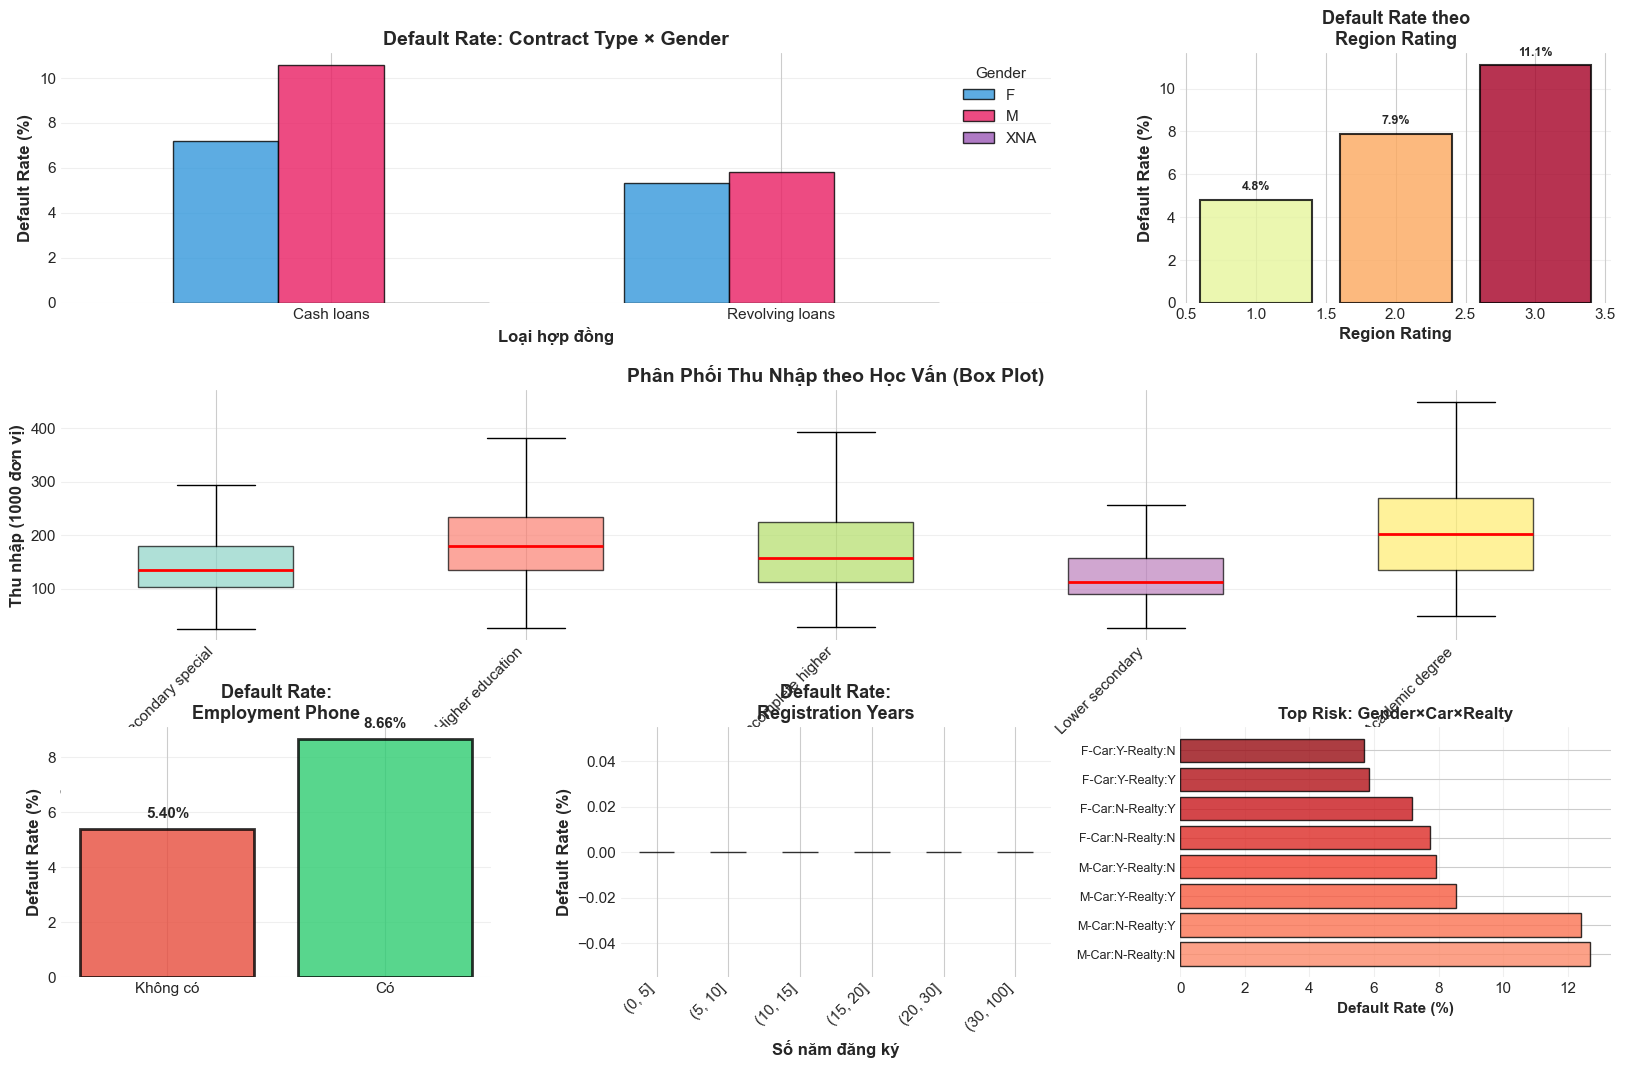

In [40]:
# Multi-dimensional analysis
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. Contract type vs Gender vs Target
ax1 = fig.add_subplot(gs[0, :2])
contract_gender = df.groupby(['NAME_CONTRACT_TYPE', 'CODE_GENDER'])['TARGET'].mean() * 100
contract_gender = contract_gender.unstack()

contract_gender.plot(kind='bar', ax=ax1, color=['#3498db', '#e91e63', '#9b59b6'],
                     alpha=0.8, edgecolor='black', width=0.7)
ax1.set_xlabel('Loại hợp đồng', fontsize=12, fontweight='bold')
ax1.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Default Rate: Contract Type × Gender', fontsize=14, fontweight='bold')
ax1.legend(title='Gender', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', alpha=0.3)

# 2. Region rating analysis
ax2 = fig.add_subplot(gs[0, 2])
region_default = df.groupby('REGION_RATING_CLIENT')['TARGET'].agg(['mean', 'count'])
region_default['mean'] = region_default['mean'] * 100

bars = ax2.bar(region_default.index, region_default['mean'],
               color=plt.cm.RdYlGn_r(region_default['mean']/region_default['mean'].max()),
               alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Region Rating', fontsize=12, fontweight='bold')
ax2.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Default Rate theo\nRegion Rating', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(region_default.iterrows()):
    ax2.text(idx, row['mean'] + 0.3, f"{row['mean']:.1f}%",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Income distribution by Education
ax3 = fig.add_subplot(gs[1, :])
edu_income = []
edu_labels = []
for edu in df['NAME_EDUCATION_TYPE'].unique():
    income_data = df[df['NAME_EDUCATION_TYPE'] == edu]['AMT_INCOME_TOTAL'] / 1000
    income_data = income_data[income_data < 500]  # Remove outliers
    edu_income.append(income_data)
    edu_labels.append(edu)

bp = ax3.boxplot(edu_income, labels=edu_labels, patch_artist=True,
                 medianprops=dict(color='red', linewidth=2),
                 boxprops=dict(alpha=0.7),
                 showfliers=False)

for patch, color in zip(bp['boxes'], plt.cm.Set3(np.linspace(0, 1, len(edu_labels)))):
    patch.set_facecolor(color)

ax3.set_xlabel('Trình độ học vấn', fontsize=12, fontweight='bold')
ax3.set_ylabel('Thu nhập (1000 đơn vị)', fontsize=12, fontweight='bold')
ax3.set_title('Phân Phối Thu Nhập theo Học Vấn (Box Plot)', fontsize=14, fontweight='bold')
ax3.set_xticklabels(edu_labels, rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# 4. Employment phone flag
ax4 = fig.add_subplot(gs[2, 0])
phone_default = df.groupby('FLAG_EMP_PHONE')['TARGET'].agg(['mean', 'count'])
phone_default['mean'] = phone_default['mean'] * 100

bars = ax4.bar(['Không có', 'Có'], phone_default['mean'].values,
               color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black', linewidth=2)
ax4.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax4.set_title('Default Rate:\nEmployment Phone', fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, phone_default['mean'].values)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{val:.2f}%', ha='center', va='bottom', fontweight='bold')

# 5. Days registration distribution
ax5 = fig.add_subplot(gs[2, 1])
df['YEARS_REGISTRATION'] = -df['DAYS_REGISTRATION'] / 365

reg_bins = [0, 5, 10, 15, 20, 30, 100]
df['REG_GROUP'] = pd.cut(df['YEARS_REGISTRATION'], bins=reg_bins)
reg_default = df.groupby('REG_GROUP')['TARGET'].mean() * 100

reg_default.plot(kind='bar', ax=ax5, color='#8e44ad', alpha=0.8, edgecolor='black')
ax5.set_xlabel('Số năm đăng ký', fontsize=12, fontweight='bold')
ax5.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax5.set_title('Default Rate:\nRegistration Years', fontsize=13, fontweight='bold')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')
ax5.grid(axis='y', alpha=0.3)

# 6. Top risk combinations
ax6 = fig.add_subplot(gs[2, 2])
risk_combos = df.groupby(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])['TARGET'].mean() * 100
risk_combos = risk_combos.sort_values(ascending=False).head(8)

bars = ax6.barh(range(len(risk_combos)), risk_combos.values,
                color=plt.cm.Reds(np.linspace(0.4, 0.9, len(risk_combos))),
                alpha=0.8, edgecolor='black', linewidth=1)
ax6.set_yticks(range(len(risk_combos)))
ax6.set_yticklabels([f"{idx[0]}-Car:{idx[1]}-Realty:{idx[2]}" for idx in risk_combos.index], 
                     fontsize=9)
ax6.set_xlabel('Default Rate (%)', fontsize=11, fontweight='bold')
ax6.set_title('Top Risk: Gender×Car×Realty', fontsize=12, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

plt.savefig('08_advanced_multifeature.png', dpi=300, bbox_inches='tight')
plt.show()

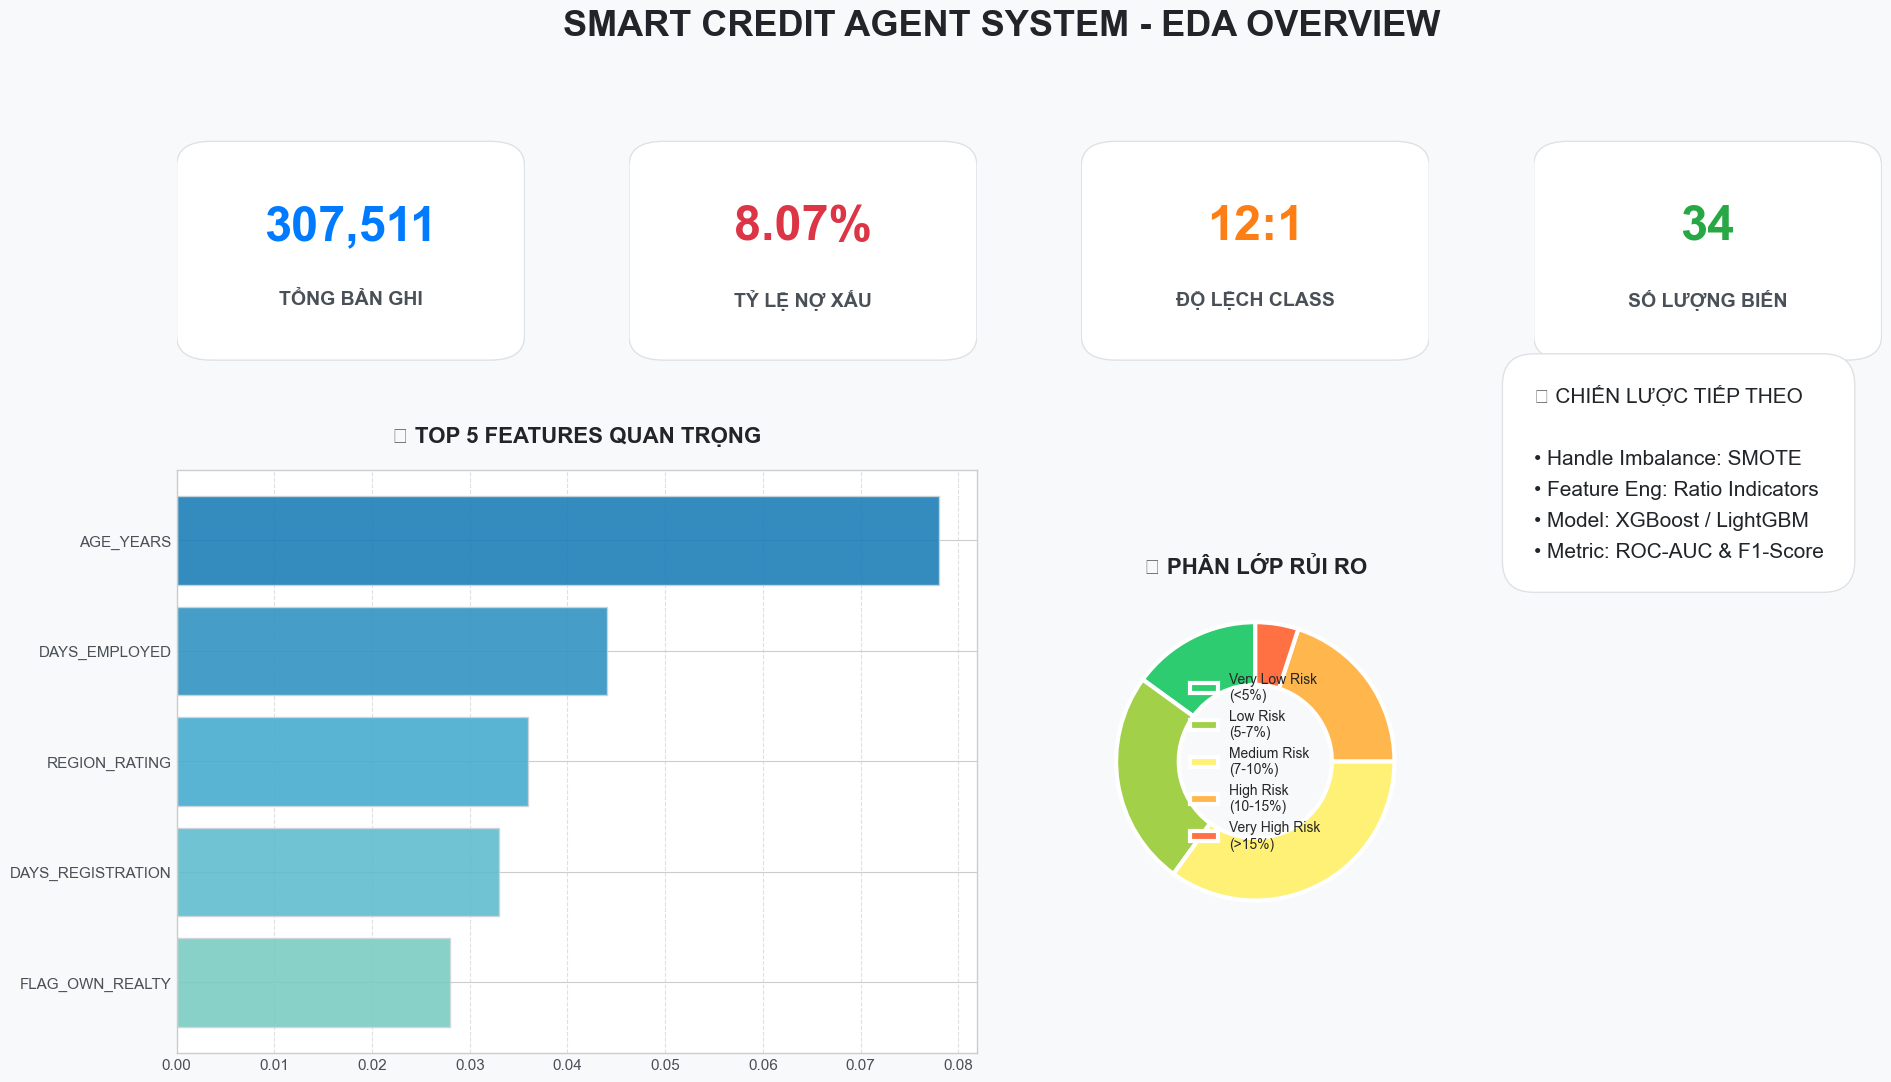

In [47]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

# 1. Thiết lập Style nền sáng
plt.style.use('seaborn-v0_8-whitegrid') 
fig = plt.figure(figsize=(22, 12))
fig.patch.set_facecolor('#f8f9fa') # Màu nền xám cực nhẹ (Off-white)

gs = gridspec.GridSpec(3, 4, hspace=0.4, wspace=0.3)

# --- PHẦN 1: METRIC CARDS (Nền sáng) ---
def create_metric(ax, label, value, color):
    ax.axis('off')
    # Con số chính: Dùng màu đậm hơn một chút để dễ đọc trên nền sáng
    ax.text(0.5, 0.6, value, fontsize=35, fontweight='bold', color=color, ha='center', va='center')
    # Nhãn bên dưới: Dùng màu xám đậm
    ax.text(0.5, 0.3, label, fontsize=14, color='#495057', ha='center', va='center', fontweight='semibold')
    
    # FancyBboxPatch với màu nền trắng và đổ bóng nhẹ (shadow-like effect)
    rect = patches.FancyBboxPatch((0.05, 0.1), 0.9, 0.8,
                                  boxstyle="round,pad=0.05,rounding_size=0.1",
                                  linewidth=1, edgecolor='#dee2e6', facecolor='white', 
                                  transform=ax.transAxes, zorder=-1)
    ax.add_patch(rect)

create_metric(fig.add_subplot(gs[0, 0]), "TỔNG BẢN GHI", f"{total_records:,}", "#007bff")
create_metric(fig.add_subplot(gs[0, 1]), "TỶ LỆ NỢ XẤU", f"{default_rate:.2f}%", "#dc3545")
create_metric(fig.add_subplot(gs[0, 2]), "ĐỘ LỆCH CLASS", f"{total_records//default_count}:1", "#fd7e14")
create_metric(fig.add_subplot(gs[0, 3]), "SỐ LƯỢNG BIẾN", f"{len(df.columns)}", "#28a745")

# --- PHẦN 2: TOP FEATURES (Màu sắc tươi sáng) ---
ax_feat = fig.add_subplot(gs[1:3, 0:2])
# Sử dụng bảng màu GnBu cho cảm giác tin cậy
colors_feat = plt.cm.GnBu(np.linspace(0.5, 0.8, 5))
bars = ax_feat.barh(features[::-1], [feature_importance[f] for f in features[::-1]], 
                    color=colors_feat, edgecolor='#ced4da', alpha=0.9)
ax_feat.set_title('🎯 TOP 5 FEATURES QUAN TRỌNG', fontsize=16, fontweight='bold', color='#212529', pad=20)
ax_feat.set_facecolor('white')
ax_feat.grid(axis='x', linestyle='--', alpha=0.6)
ax_feat.tick_params(colors='#495057')

# --- PHẦN 3: RISK SEGMENTS (Donut Chart) ---
ax_risk = fig.add_subplot(gs[1:3, 2])
# Bảng màu rủi ro tiêu chuẩn nhưng tươi hơn
colors_risk = ['#2ecc71', '#a2d149', '#fff176', '#ffb74d', '#ff7043']
wedges, _ = ax_risk.pie(risk_segments.values(), labels=None, startangle=90, 
                         colors=colors_risk,
                         wedgeprops=dict(width=0.45, edgecolor='white', linewidth=3))
ax_risk.set_title('📊 PHÂN LỚP RỦI RO', fontsize=16, fontweight='bold', color='#212529', pad=10)
ax_risk.legend(wedges, risk_segments.keys(), loc="center", fontsize=10, frameon=False)

# --- PHẦN 4: ACTION PLAN (Sửa lỗi lineheight -> linespacing) ---
ax_plan = fig.add_subplot(gs[1:3, 3])
ax_plan.axis('off')
plan_text = "💡 CHIẾN LƯỢC TIẾP THEO\n\n" \
            "• Handle Imbalance: SMOTE\n" \
            "• Feature Eng: Ratio Indicators\n" \
            "• Model: XGBoost / LightGBM\n" \
            "• Metric: ROC-AUC & F1-Score"

# Sửa lineheight thành linespacing (giá trị mặc định là 1.2, bạn có thể để 1.8 cho thoáng)
ax_plan.text(0, 0.85, plan_text, fontsize=15, family='sans-serif', color='#212529', 
             linespacing=1.8,
             bbox=dict(boxstyle='round,pad=1.5', facecolor='white', edgecolor='#dee2e6', alpha=1))

# --- Tiêu đề chính và các phần còn lại giữ nguyên ---
fig.suptitle('SMART CREDIT AGENT SYSTEM - EDA OVERVIEW', 
             fontsize=26, fontweight='bold', color='#212529', y=0.98)

plt.savefig('09_summary_dashboard_light.png', dpi=300, facecolor='#f8f9fa')
plt.show()